<a href="https://colab.research.google.com/github/Stewu44/Python_projects/blob/main/historical_volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


            HV_20_Day
Date                 
2024-10-11   0.213815
2024-10-14   0.209902
2024-10-15   0.210019
2024-10-16   0.210266
2024-10-17   0.378158


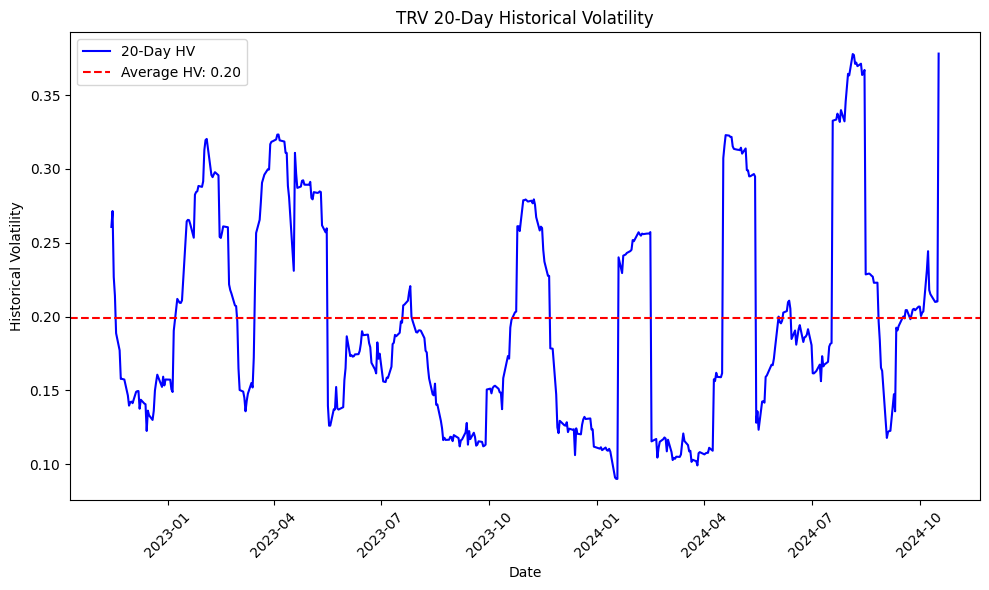

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the share symbol (for example, TSLA for Tesla)
share = 'TRV'

# Download the historical data from Yahoo Finance for the last 3 months
data = yf.download(share, period="2y", interval="1d")

# Calculate daily returns (percentage change between consecutive close prices)
data['Daily_Return'] = data['Adj Close'].pct_change()

# Calculate the 20-day rolling standard deviation of daily returns (historical volatility)
data['HV_20_Day'] = data['Daily_Return'].rolling(window=20).std() * np.sqrt(252)

# Drop rows with NaN values (due to rolling calculation)
share_hv_20_day = data[['HV_20_Day']].dropna()

# Calculate the average 20-day historical volatility over the period
average_hv = share_hv_20_day['HV_20_Day'].mean()

# Display the last 60 rows of the HV data
print(share_hv_20_day.tail(5))

# Plot the 20-day historical volatility
plt.figure(figsize=(10,6))
plt.plot(share_hv_20_day.index, share_hv_20_day['HV_20_Day'], label='20-Day HV', color='b')

# Add a horizontal line for the average HV
plt.axhline(y=average_hv, color='r', linestyle='--', label=f'Average HV: {average_hv:.2f}')

# Add labels and title
plt.title(f'{share} 20-Day Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Historical Volatility')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
